In [21]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [22]:
env = BlackjackEnv()

In [29]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    gamma = discount_factor
    V = defaultdict(float)
    for episode in range(1, num_episodes + 1):

        episodes = []
        s = env.reset()
        done = False
        while done == False:
            a = policy(s)
            future_s, r, done, _ = env.step(a)
            episodes.append((s, a, r))
            s = future_s

        states_in_episode = set([tuple(x[0]) for x in episodes])
        for s in states_in_episode:
            first_visit_i = next(i for i,x in enumerate(episodes) if x[0] == s)
            G = sum([x[2]*(gamma**i) for i,x in enumerate(episodes[first_visit_i:])])
            returns_sum[s] += G
            returns_count[s] += 1.0
            V[s] = returns_sum[s] / returns_count[s]

    return V    

In [30]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

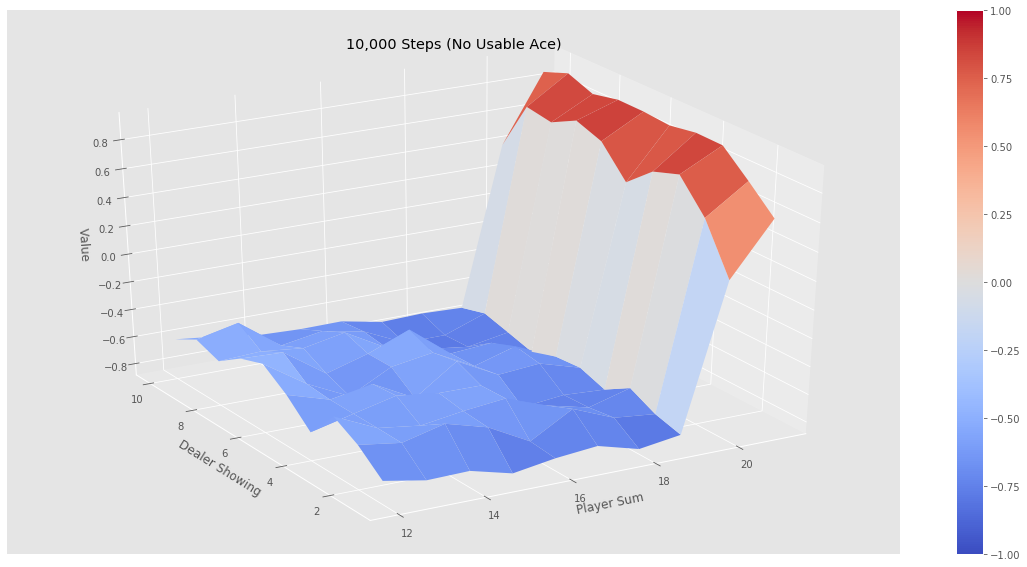

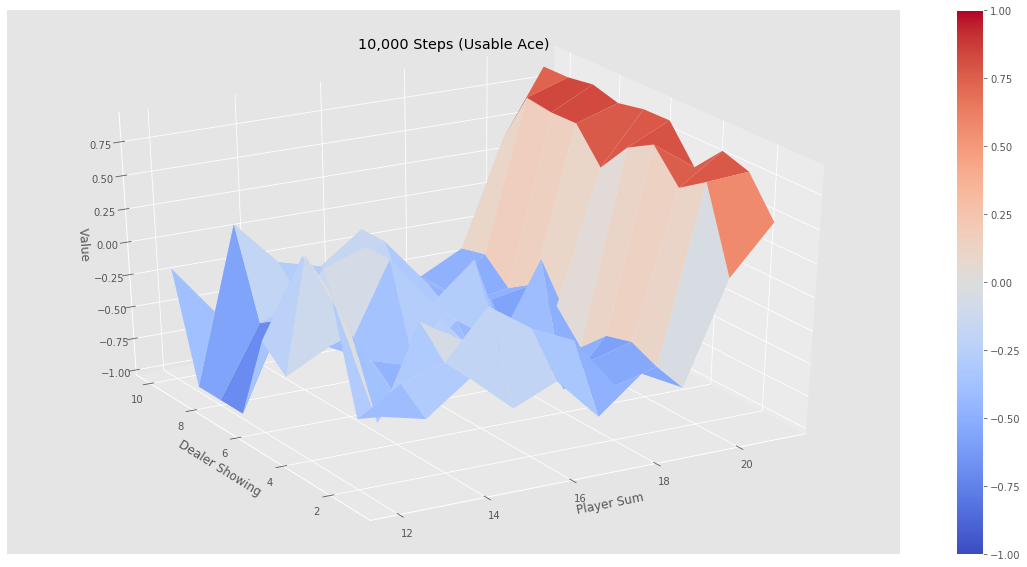

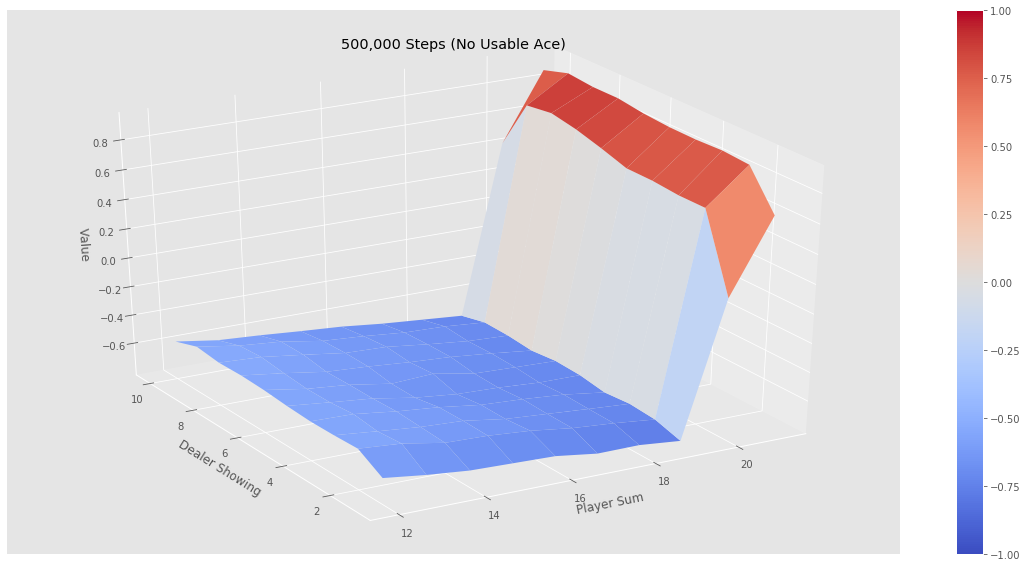

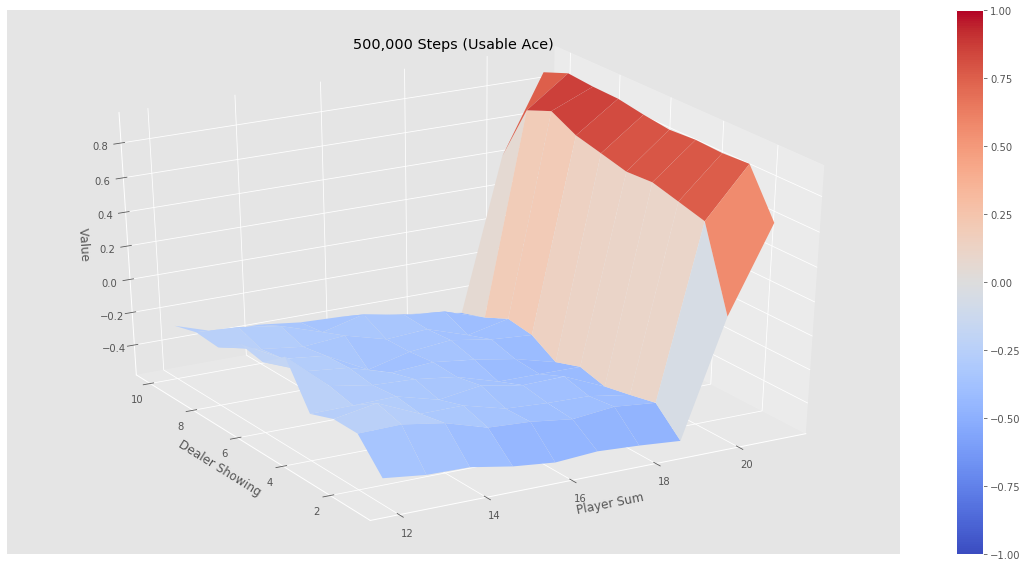

In [31]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")